In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import gmaps
# # Google developer API key
# from config import gkey

# # Access maps with unique API key
# gmaps.configure(api_key=gkey)

In [142]:
# A dataframe to get coordinates from zip codes
# Lat, Lng data from https://public.opendatasoft.com
path = '../../Resources/GeoData/us-zip-code-latitude-and-longitude.csv'
zip_data = pd.DataFrame(pd.read_csv(path, index_col=False))
zip_data = zip_data.drop(columns=['Timezone','Daylight savings time flag','geopoint'])
zip_data.head()

,Zip,City,State,Latitude,Longitude
0,71937,Cove,AR,34.398483,-94.39398
1,72044,Edgemont,AR,35.624351,-92.16056
2,56171,Sherburn,MN,43.660847,-94.74357
3,49430,Lamont,MI,43.010337,-85.89754
4,52585,Richland,IA,41.194129,-91.98027


In [143]:
path2 = '../../Resources/GeoData/permits_by_zip.csv'

permits = pd.DataFrame(pd.read_csv(path2, header=None))

permits = permits.rename(columns = {0:'Zip', 1:'Permits Issued (2008-2018)'})

permits.head()

,Zip,Permits Issued (2008-2018)
0,78704.0,44889
1,78745.0,34643
2,78748.0,31675
3,78723.0,29773
4,78703.0,28982


In [144]:
permits_zip = pd.merge(permits, zip_data, on='Zip',how='left')

permits_zip.head()

,Zip,Permits Issued (2008-2018),City,State,Latitude,Longitude
0,78704.0,44889,Austin,TX,30.246309,-97.76087
1,78745.0,34643,Austin,TX,30.207559,-97.79575
2,78748.0,31675,Austin,TX,30.172020,-97.82265
3,78723.0,29773,Austin,TX,30.306507,-97.68651
4,78703.0,28982,Austin,TX,30.290907,-97.76277


In [145]:
geocords = []
permit_count = []

for index, row in permits_zip.iterrows():
    geocords.append((row['Latitude'], row['Longitude']))
    permit_count.append(row['Permits Issued (2008-2018)'])

# Plot Heatmap
figure_layout = {
    'width': '1000px',
    'height': '750px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

fig.add_layer(gmaps.heatmap_layer(geocords,permit_count))
fig

Figure(layout=FigureLayout(border='1px solid black', height='750px', margin='0 auto 0 auto', padding='1px', wi…

In [146]:
path3 = '../../Resources/Zillow_data/Zip_Zri_AllHomesPlusMultifamily_Summary.csv'

rent_df = pd.DataFrame(pd.read_csv(path3))

rent_df.head()

,Date,RegionName,State,Metro,County,City,SizeRank,Zri,MoM,QoQ,YoY,ZriRecordCnt
0,2020-01-31,60657,IL,Chicago-Naperville-Elgin,Cook County,Chicago,0,1996,-0.0278,-0.0610,-0.0146,32023
1,2020-01-31,77494,TX,Houston-The Woodlands-Sugar Land,Harris County,Katy,1,1778,0.0013,0.0079,0.0022,43054
2,2020-01-31,77449,TX,Houston-The Woodlands-Sugar Land,Harris County,Katy,2,1443,-0.0071,0.0247,0.0179,41100
3,2020-01-31,10002,NY,New York-Newark-Jersey City,New York County,New York,3,3605,-0.0139,-0.0316,0.0223,12425
4,2020-01-31,77084,TX,Houston-The Woodlands-Sugar Land,Harris County,Houston,4,1438,0.0013,0.0122,0.0216,31001


In [147]:
zips = permits_zip['Zip'].to_list()

zris = {}

for index, row in rent_df.iterrows():
    for z in zips:
        if z == row['RegionName']:
            zris[z] = [row['Zri']]

In [148]:
rent_zip = pd.DataFrame(data=zris).T

rent_zip = rent_zip.reset_index()

rent_zip = rent_zip.rename(columns = {'index':'Zip',0:'Zillow Rent Index (ZRI)'})

rent_zip.head()

,Zip,Zillow Rent Index (ZRI)
0,78660.0,1521
1,78613.0,1552
2,78704.0,1894
3,78745.0,1551
4,78641.0,1546


In [149]:
rent_permits = pd.merge(permits_zip,rent_zip,on='Zip',how='inner')
rent_permits.head()

,Zip,Permits Issued (2008-2018),City,State,Latitude,Longitude,Zillow Rent Index (ZRI)
0,78704.0,44889,Austin,TX,30.246309,-97.76087,1894
1,78745.0,34643,Austin,TX,30.207559,-97.79575,1551
2,78748.0,31675,Austin,TX,30.172020,-97.82265,1617
3,78723.0,29773,Austin,TX,30.306507,-97.68651,1666
4,78703.0,28982,Austin,TX,30.290907,-97.76277,2246


In [150]:
rent_geo = []
zri = []

for index, row in rent_permits.iterrows():
    rent_geo.append((row['Latitude'], row['Longitude']))
    zri.append(row['Zillow Rent Index (ZRI)'])

# Plot Heatmap
figure_layout = {
    'width': '1000px',
    'height': '750px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

fig.add_layer(gmaps.heatmap_layer(rent_geo,zri))
fig

Figure(layout=FigureLayout(border='1px solid black', height='750px', margin='0 auto 0 auto', padding='1px', wi…

In [157]:
path_tax_2011 = '../../resources/Tax_Data/IRS_Zip_2011.csv'

tax_df_2011 = pd.DataFrame(pd.read_csv(path_tax_2011))

tax_df_2011 = tax_df_2011.rename(columns={'ZIPCODE':'Zip',
                                'agi_stub':'Tax Bracket',
                                'N1':'Number of Returns (2011)',
                                'N2':'Number of Exemptions (2011)',
                                'A00100':'Adjusted Gross Income (AGI) (2011)'})

tax_df_2011 = tax_df_2011.loc[tax_df_2011['Zip']!=0]
tax_df_2011 = tax_df_2011.loc[tax_df_2011['Zip']!=99999]
tax_df_2011 = tax_df_2011.loc[tax_df_2011['STATE']=='TX']

path_tax_2017 = '../../resources/Tax_Data/IRS_Zip_2017.csv'

tax_df_2017 = pd.DataFrame(pd.read_csv(path_tax_2016))

tax_df_2017 = tax_df_2017.rename(columns={'zipcode':'Zip',
                                'agi_stub':'Tax Bracket (2017)',
                                'N1':'Number of Returns (2017)',
                                'N2':'Number of Exemptions (2017)',
                                'A00100':'Adjusted Gross Income (AGI) (2017)'})

tax_df_2017 = tax_df_2017.loc[tax_df_2017['Zip']!=0]
tax_df_2017 = tax_df_2017.loc[tax_df_2017['Zip']!=99999]
tax_df_2017 = tax_df_2017.loc[tax_df_2017['STATE']=='TX']


# tax_df = pd.merge(tax_df_2011, tax_df_2017, on='Zip', how='outer')

# tax_df.head()

In [158]:
# tax_df = tax_df[['Zip',
#                  'Tax Bracket',
#                  'Number of Returns (2011)',
#                  'Number of Returns (2017)',
#                  'Number of Exemptions (2011)',
#                  'Number of Exemptions (2017)',
#                  'Adjusted Gross Income (AGI) (2011)',
#                  'Adjusted Gross Income (AGI) (2017)']]


# tax_df.head(10)

In [159]:
# austin_zip_info = pd.merge(tax_df, rent_permits, on='Zip', how='inner')
# austin_zip_info.head(10)

In [167]:
tax_bracks_2011 = {}
agi_2011 = {}

for index, row in tax_df_2011.iterrows():
    if row['Zip'] not in tax_bracks_2011:
        
        tax_bracks_2011[row['Zip']] = {}
        agi_2011[row['Zip']] = {}
        
        if row['Tax Bracket'] == 1.0:
            tax_bracks_2011[row['Zip']]['<$25,000'] = (row['Number of Returns (2011)'] + row['Number of Exemptions (2011)'])
            agi_2011[row['Zip']]['<$25,000'] = row['Adjusted Gross Income (AGI) (2011)']
        elif row['Tax Bracket'] == 2.0:
            tax_bracks_2011[row['Zip']]['$50,000'] = (row['Number of Returns (2011)'] + row['Number of Exemptions (2011)'])
            agi_2011[row['Zip']]['$50,000'] = row['Adjusted Gross Income (AGI) (2011)']
        elif row['Tax Bracket'] == 3.0:
            tax_bracks_2011[row['Zip']]['$75,000'] = (row['Number of Returns (2011)'] + row['Number of Exemptions (2011)'])
            agi_2011[row['Zip']]['$75,000'] = row['Adjusted Gross Income (AGI) (2011)']
        elif row['Tax Bracket'] == 4.0:
            tax_bracks_2011[row['Zip']]['$100,000'] = (row['Number of Returns (2011)'] + row['Number of Exemptions (2011)'])
            agi_2011[row['Zip']]['$100,000'] = row['Adjusted Gross Income (AGI) (2011)']
        elif row['Tax Bracket'] == 5.0:
            tax_bracks_2011[row['Zip']]['$200,000'] = (row['Number of Returns (2011)'] + row['Number of Exemptions (2011)'])
            agi_2011[row['Zip']]['$200,000'] = row['Adjusted Gross Income (AGI) (2011)']
        elif row['Tax Bracket'] == 6.0:
            tax_bracks_2011[row['Zip']]['$200,000<'] = (row['Number of Returns (2011)'] + row['Number of Exemptions (2011)'])
            agi_2011[row['Zip']]['$200,000<'] = row['Adjusted Gross Income (AGI) (2011)']            
    
    else:
        
        if row['Tax Bracket'] == 1.0:
            tax_bracks_2011[row['Zip']]['<$25,000'] = (row['Number of Returns (2011)'] + row['Number of Exemptions (2011)'])
            agi_2011[row['Zip']]['<$25,000'] = row['Adjusted Gross Income (AGI) (2011)']
        elif row['Tax Bracket'] == 2.0:
            tax_bracks_2011[row['Zip']]['$50,000'] = (row['Number of Returns (2011)'] + row['Number of Exemptions (2011)'])
            agi_2011[row['Zip']]['$50,000'] = row['Adjusted Gross Income (AGI) (2011)']
        elif row['Tax Bracket'] == 3.0:
            tax_bracks_2011[row['Zip']]['$75,000'] = (row['Number of Returns (2011)'] + row['Number of Exemptions (2011)'])
            agi_2011[row['Zip']]['$75,000'] = row['Adjusted Gross Income (AGI) (2011)']
        elif row['Tax Bracket'] == 4.0:
            tax_bracks_2011[row['Zip']]['$100,000'] = (row['Number of Returns (2011)'] + row['Number of Exemptions (2011)'])
            agi_2011[row['Zip']]['$100,000'] = row['Adjusted Gross Income (AGI) (2011)']
        elif row['Tax Bracket'] == 5.0:
            tax_bracks_2011[row['Zip']]['$200,000'] = (row['Number of Returns (2011)'] + row['Number of Exemptions (2011)'])
            agi_2011[row['Zip']]['$200,000'] = row['Adjusted Gross Income (AGI) (2011)']
        elif row['Tax Bracket'] == 6.0:
            tax_bracks_2011[row['Zip']]['$200,000<'] = (row['Number of Returns (2011)'] + row['Number of Exemptions (2011)'])
            agi_2011[row['Zip']]['$200,000<'] = row['Adjusted Gross Income (AGI) (2011)']            

In [168]:
tax_bracks_2017 = {}
agi_2017 = {}

for index, row in tax_df_2017.iterrows():
    if row['Zip'] not in tax_bracks_2017:
        
        tax_bracks_2017[row['Zip']] = {}
        agi_2017[row['Zip']] = {}
        
        if row['Tax Bracket'] == 1.0:
            tax_bracks_2017[row['Zip']]['<$25,000'] = (row['Number of Returns (2017)'] + row['Number of Exemptions (2017)'])
            agi_2017[row['Zip']]['<$25,000'] = row['Adjusted Gross Income (AGI) (2017)']
        elif row['Tax Bracket'] == 2.0:
            tax_bracks_2017[row['Zip']]['$50,000'] = (row['Number of Returns (2017)'] + row['Number of Exemptions (2017)'])
            agi_2017[row['Zip']]['$50,000'] = row['Adjusted Gross Income (AGI) (2017)']
        elif row['Tax Bracket'] == 3.0:
            tax_bracks_2017[row['Zip']]['$75,000'] = (row['Number of Returns (2017)'] + row['Number of Exemptions (2017)'])
            agi_2017[row['Zip']]['$75,000'] = row['Adjusted Gross Income (AGI) (2017)']
        elif row['Tax Bracket'] == 4.0:
            tax_bracks_2017[row['Zip']]['$100,000'] = (row['Number of Returns (2017)'] + row['Number of Exemptions (2017)'])
            agi_2017[row['Zip']]['$100,000'] = row['Adjusted Gross Income (AGI) (2017)']
        elif row['Tax Bracket'] == 5.0:
            tax_bracks_2017[row['Zip']]['$200,000'] = (row['Number of Returns (2017)'] + row['Number of Exemptions (2017)'])
            agi_2017[row['Zip']]['$200,000'] = row['Adjusted Gross Income (AGI) (2017)']
        elif row['Tax Bracket'] == 6.0:
            tax_bracks_2017[row['Zip']]['$200,000<'] = (row['Number of Returns (2017)'] + row['Number of Exemptions (2017)'])
            agi_2017[row['Zip']]['$200,000<'] = row['Adjusted Gross Income (AGI) (2017)'] 
            
    else:
        
        if row['Tax Bracket'] == 1.0:
            tax_bracks_2017[row['Zip']]['<$25,000'] = (row['Number of Returns (2017)'] + row['Number of Exemptions (2017)'])
            agi_2017[row['Zip']]['<$25,000'] = row['Adjusted Gross Income (AGI) (2017)']
        elif row['Tax Bracket'] == 2.0:
            tax_bracks_2017[row['Zip']]['$50,000'] = (row['Number of Returns (2017)'] + row['Number of Exemptions (2017)'])
            agi_2017[row['Zip']]['$50,000'] = row['Adjusted Gross Income (AGI) (2017)']
        elif row['Tax Bracket'] == 3.0:
            tax_bracks_2017[row['Zip']]['$75,000'] = (row['Number of Returns (2017)'] + row['Number of Exemptions (2017)'])
            agi_2017[row['Zip']]['$75,000'] = row['Adjusted Gross Income (AGI) (2017)']
        elif row['Tax Bracket'] == 4.0:
            tax_bracks_2017[row['Zip']]['$100,000'] = (row['Number of Returns (2017)'] + row['Number of Exemptions (2017)'])
            agi_2017[row['Zip']]['$100,000'] = row['Adjusted Gross Income (AGI) (2017)']
        elif row['Tax Bracket'] == 5.0:
            tax_bracks_2017[row['Zip']]['$200,000'] = (row['Number of Returns (2017)'] + row['Number of Exemptions (2017)'])
            agi_2017[row['Zip']]['$200,000'] = row['Adjusted Gross Income (AGI) (2017)']
        elif row['Tax Bracket'] == 6.0:
            tax_bracks_2017[row['Zip']]['$200,000<'] = (row['Number of Returns (2017)'] + row['Number of Exemptions (2017)'])
            agi_2017[row['Zip']]['$200,000<'] = row['Adjusted Gross Income (AGI) (2017)'] 

In [169]:
brackets = ['<$25,000','$50,000','$75,000','$100,000','$200,000','$200,000<']

atx_tax_2011 = pd.DataFrame(data=tax_bracks_2011)
atx_tax_2011['Total Returns and Exemptions'] = atx_tax_2011.sum(axis=1)
atx_tax_2011 = atx_tax_2011.T
atx_tax_2011 = atx_tax_2011[brackets].reset_index()
atx_tax_2011 = atx_tax_2011.rename(columns={'index':'Zip'}).set_index('Zip')

atx_tax_2017 = pd.DataFrame(data=tax_bracks_2017)
atx_tax_2017['Total Returns and Exemptions'] = atx_tax_2017.sum(axis=1)
atx_tax_2017 = atx_tax_2017.T
atx_tax_2017 = atx_tax_2017[brackets].reset_index()
atx_tax_2017 = atx_tax_2017.rename(columns={'index':'Zip'}).set_index('Zip')

atx_agi_2011 = pd.DataFrame(data=agi_2011)
atx_agi_2011['Total AGI'] = atx_agi_2011.sum(axis=1)
atx_agi_2011 = atx_agi_2011.T
atx_agi_2011 = atx_agi_2011[brackets].reset_index()
atx_agi_2011 = atx_agi_2011.rename(columns={'index':'Zip'}).set_index('Zip')

atx_agi_2017 = pd.DataFrame(data=agi_2017)
atx_agi_2017['Total AGI'] = atx_agi_2017.sum(axis=1)
atx_agi_2017 = atx_agi_2017.T
atx_agi_2017 = atx_agi_2017[brackets].reset_index()
atx_agi_2017 = atx_agi_2017.rename(columns={'index':'Zip'}).set_index('Zip')

atx_tax_2017.head()

,"<$25,000","$50,000","$75,000","$100,000","$200,000","$200,000<"
Zip,,,,,,
75001,5210.0,5890.0,3930.0,2410.0,3280.0,1730.0
75002,17670.0,15570.0,12270.0,11550.0,26440.0,12030.0
75006,21410.0,22990.0,10810.0,5860.0,7840.0,1880.0
75007,18180.0,17580.0,11570.0,8910.0,16250.0,4440.0
75009,3290.0,2810.0,2340.0,2360.0,6910.0,3160.0


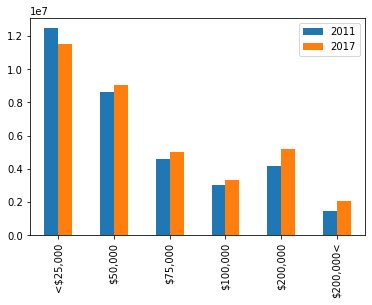

In [170]:
total_tax = pd.DataFrame({'2011':atx_tax_2011.loc['Total Returns and Exemptions'],'2017':atx_tax_2017.loc['Total Returns and Exemptions']})
total_tax.plot(kind='bar')

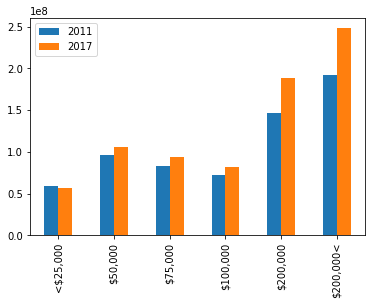

In [171]:
total_agi = pd.DataFrame({'2011':atx_agi_2011.loc['Total AGI'],'2017':atx_agi_2017.loc['Total AGI']})
total_agi.plot(kind='bar')

In [ ]:
# A function to create linear regression plots
def regress(x, y, title, xlab, ylab):
    
    # Calculates linear regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
    x = np.asarray(x, dtype=np.float64)
    regress_values = x * slope + intercept

    # Plots scatter plot and regresion
    plt.figure(figsize=(8, 6))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")

    # Annotates graph with equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,xy=(0,0),fontsize=15,color="red")
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)

    # Prints r squared value from linregress function
    print(f'The r-squared is: {rvalue}')

In [ ]:
path_pop = '../../Resources/Census.gov/By_Year/Austin_population/Austin_population_2013.csv'
demog_df = pd.DataFrame(pd.read_csv(path_pop))
demog_df = demog_df.rename(columns={'Zipcode':'Zip'})


path_pov = '../../Resources/Census.gov/By_Year/Austin_poverty/Austin_poverty_2013.csv'
pov_df = pd.DataFrame(pd.read_csv(path_pov))
pov_df = pov_df.rename(columns={'Zipcode':'Zip'})


path_edu = '../../Resources/Census.gov/By_Year/Austin_education/Austin_education_2013.csv'
edu_df = pd.DataFrame(pd.read_csv(path_edu))
edu_df = edu_df.rename(columns={'Zipcode':'Zip'})

housing_path = '../../Resources/Census.gov/By_Year/Austin_housing/Austin_housing_2013.csv'
housing_df = pd.DataFrame(pd.read_csv(housing_path))
housing_df = housing_df.rename(columns={'Zipcode':'Zip'})

In [ ]:
austin_geo_df = pd.merge(zip_data,demog_df,on='Zip',how='left')

austin_geo_df = pd.merge(austin_geo_df,pov_df,on='Zip',how='left')

austin_geo_df = pd.merge(austin_geo_df,edu_df,on='Zip',how='left')

austin_geo_df = pd.merge(austin_geo_df,housing_df,on='Zip',how='left')


austin_geo_df = austin_geo_df.dropna(how='any')

austin_geo_df = austin_geo_df.loc[austin_geo_df['Household Income'] != -666666666.0]

austin_geo_df.to_csv('../../Resources/All_2013_Census_Data.csv')

austin_geo_df.head()

In [ ]:
austin_geocords = []
house_income = []

for index, row in austin_geo_df.iterrows():
    austin_geocords.append((row['Latitude'], row['Longitude']))
    row['Household Income'] = int(row['Household Income'])
    house_income.append(row['Household Income'])

# Plot Heatmap
figure_layout = {
    'width': '1000px',
    'height': '750px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

fig.add_layer(gmaps.heatmap_layer(austin_geocords,house_income))
fig

In [ ]:
austin_geocords = []
nonwhite = []
white = []

for index, row in austin_geo_df.iterrows():
    austin_geocords.append((row['Latitude'], row['Longitude']))
    row['Population (Black Alone)'] = int(row['Population (Black Alone)'])
    row['Population'] = int(row['Population'])
    row['Population (White Alone)'] = int(row['Population (White Alone)'])
    white.append(row['Population (White Alone)'])
    nonwhite.append(row['Population'] - row['Population (White Alone)'])

# Plot Heatmap
figure_layout = {
    'width': '1000px',
    'height': '750px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

fig.add_layer(gmaps.heatmap_layer(austin_geocords,nonwhite))
fig

In [ ]:
regress(nonwhite, house_income, 'Household Income of Nonwhite Population by Zip Code (2013)', 
        'Number of Residents', 'Household Income')

In [ ]:
regress(white, house_income, 'Household Income of White Population by Zip Code (2013)', 
        'Number of Residents', 'Household Income')

In [ ]:
austin_geocords = []
age = []

for index, row in austin_geo_df.iterrows():
    austin_geocords.append((row['Latitude'], row['Longitude']))
    row['Median Age'] = int(row['Median Age'])
    age.append(row['Median Age'])

# Plot Heatmap
figure_layout = {
    'width': '1000px',
    'height': '750px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

fig.add_layer(gmaps.heatmap_layer(austin_geocords,age))
fig

In [ ]:
austin_geocords = []
college = []

for index, row in austin_geo_df.iterrows():
    austin_geocords.append((row['Latitude'], row['Longitude']))
    row["Education (Bachelor's)"] = int(row["Education (Bachelor's)"])
    row["Education (Master's)"] = int(row["Education (Master's)"])
    row["Education (Professional)"] = int(row["Education (Professional)"])
    row["Education (Doctorate)"] = int(row["Education (Doctorate)"])
    college.append(row["Education (Bachelor's)"]+row["Education (Master's)"]+row["Education (Professional)"]+row["Education (Doctorate)"])

# Plot Heatmap
figure_layout = {
    'width': '1000px',
    'height': '750px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

fig.add_layer(gmaps.heatmap_layer(austin_geocords,college))
fig

In [ ]:
regress(college, house_income, 'Household Income by Upper Educated Population by Zip Code (2013)', 
        'Number of College-Educated Residents', 'Household Income')

In [ ]:
austin_geocords = []
poverty = []

for index, row in austin_geo_df.iterrows():
    austin_geocords.append((row['Latitude'], row['Longitude']))
    row['Total Poverty Count'] = int(row['Total Poverty Count'])
    poverty.append(row['Total Poverty Count'])

# Plot Heatmap
figure_layout = {
    'width': '1000px',
    'height': '750px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

fig.add_layer(gmaps.heatmap_layer(austin_geocords,poverty))
fig

In [ ]:
regress(nonwhite, poverty, 'Poverty of Nonwhite Population by Zip Code (2013)', 
        'Number of Nonwhite Residents', 'Number Experiencing Poverty')

In [ ]:
austin_geocords = []
house_years = []

for index, row in austin_geo_df.iterrows():
    austin_geocords.append((row['Latitude'], row['Longitude']))
    row['Median year housing units were built'] = float(row['Median year housing units were built'])
    house_years.append(row['Median year housing units were built']-1950)
        
# Plot Heatmap
figure_layout = {
    'width': '1000px',
    'height': '750px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

fig.add_layer(gmaps.heatmap_layer(austin_geocords,house_years))
fig
